In [1]:
%pylab inline  
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('factbook.csv')
dataframe  = df.copy()

Выкинем строки с пропусками в основных параметрах

In [3]:
dataframe = dataframe[pd.notnull(dataframe['GDP']) & pd.notnull(dataframe['Unemployment rate(%)'])
                     &pd.notnull(dataframe['Death rate(deaths/1000 population)']) & pd.notnull(dataframe['Debt - external'])
                     &pd.notnull(dataframe['Area(sq km)']) &pd.notnull(dataframe['Population']) &
                     pd.notnull(dataframe['Exports'])&pd.notnull(dataframe['Birth rate(births/1000 population)'])
                     &pd.notnull(dataframe['Electricity - consumption(kWh)'])&pd.notnull(dataframe['Electricity - production(kWh)'])
                     &pd.notnull(dataframe['Reserves of foreign exchange & gold'])
                     &pd.notnull(dataframe['Industrial production growth rate(%)'])
                     &pd.notnull(dataframe['Military expenditures - dollar figure'])]
dataframe = dataframe.drop(['Public debt(% of GDP)', 'Railways(km)', 'Oil - proved reserves(bbl)', 'Current account balance'
                           ,'Oil - exports(bbl/day)','Oil - imports(bbl/day)','Natural gas - production(cu m)',
                           'Natural gas - proved reserves(cu m)',
                           'Natural gas - exports(cu m)',
                           'Natural gas - imports(cu m)',
                           'Natural gas - consumption(cu m)',
                           'Internet hosts',
                           'Military expenditures - percent of GDP(%)',
                           'Investment (gross fixed)(% of GDP)',
                           'Labor force','HIV/AIDS - adult prevalence rate(%)','HIV/AIDS - deaths',
                            'HIV/AIDS - people living with HIV/AIDS'], axis=1)
dataframe = dataframe.iloc[1:] #Выкидываем первую строчку с типами переменных
dataframe = dataframe.reset_index(drop=True)
dataframe

,Country,Area(sq km),Birth rate(births/1000 population),Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,GDP - per capita,...,Life expectancy at birth(years),Military expenditures - dollar figure,Oil - consumption(bbl/day),Oil - production(bbl/day),Population,Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
0,Albania,28748,15.08,5.12,1410000000,6760000000,5680000000,552400000,17460000000,4900,...,77.24,56500000,7500,2000,3563112,1206000000,255000,1100000,2.04,14.80
1,Algeria,2381740,17.13,4.60,21900000000,23610000000,25760000000,32160000000,212300000000,6600,...,73.00,2480000000,209000,1200000,32531853,43550000000,2199600,1447310,1.92,25.40
2,Argentina,2766890,16.90,7.56,157700000000,81650000000,81390000000,33780000000,483500000000,12400,...,75.91,4300000000,486000,755000,39537943,19470000000,8009400,6500000,2.19,14.80
3,Armenia,29800,11.76,8.16,905000000,5797000000,6492000000,850000000,13650000000,4600,...,71.55,135000000,5700,0,2982904,555000000,562600,114400,1.32,30.00
4,Australia,7686850,12.26,7.44,308700000000,195600000000,210300000000,86890000000,611700000000,30700,...,80.39,1665000000,796500,537500,20090437,35140000000,10815000,14347000,1.76,5.10
5,Austria,83870,8.81,9.70,15500000000,55090000000,58490000000,102700000000,255900000000,31300,...,78.92,1497000000,262400,20670,8184691,12730000000,3881000,7094500,1.36,4.40
6,Azerbaijan,86600,20.40,9.86,1832000000,17370000000,17550000000,3168000000,30010000000,3800,...,63.35,121000000,140000,312800,7911974,875000000,923800,870000,2.44,1.20
7,Bahrain,665,18.10,4.08,6215000000,6379000000,6860000000,8205000000,13010000000,19200,...,74.23,628900000,40000,44000,688345,2141000000,185800,443100,2.63,15.00
8,Bangladesh,144000,30.01,8.40,19970000000,15300000000,16450000000,7478000000,275700000000,2000,...,62.08,995300000,71000,3581,144319628,3000000000,740000,1365000,3.13,40.00
9,Belarus,207600,10.83,14.15,600000000,34300000000,30000000000,11470000000,70500000000,6800,...,68.72,176100000,285000,36000,10300483,770200000,3071300,1118000,1.39,2.00


Преобразуем типы переменных от строковых к численным

In [4]:
dataframe["Unemployment rate(%)"] = pd.to_numeric(dataframe["Unemployment rate(%)"])
dataframe["Area(sq km)"] = pd.to_numeric(dataframe["Area(sq km)"])
dataframe["Death rate(deaths/1000 population)"] = pd.to_numeric(dataframe["Death rate(deaths/1000 population)"])
dataframe["Debt - external"] = pd.to_numeric(dataframe["Debt - external"])
dataframe["GDP - per capita"] = pd.to_numeric(dataframe["GDP - per capita"])
dataframe["Exports"] = pd.to_numeric(dataframe["Exports"])
dataframe["Population"] = pd.to_numeric(dataframe["Population"])
dataframe["Life expectancy at birth(years)"] = pd.to_numeric(dataframe["Life expectancy at birth(years)"])

Создадим новый датафрейм, в который вставим столбцы с выбранными признаками, нормализуем их и применим K-means, сначала для 5 признаков, а потом для 9

         Country
Cluster         
0             15
1             40
2             11
3              9
4             35
                                                   Country
Cluster                                                   
0        AzerbaijanBoliviaCambodiaCote d'IvoireGabonGha...
1        AustraliaAustriaBelarusBelgiumCanadaChileCosta...
2        ArmeniaBangladeshBosnia and HerzegovinaEquator...
3        BotswanaCameroonKenyaLesothoMozambiqueSouth Af...
4        AlbaniaAlgeriaArgentinaBahrainBelizeBrazilBulg...


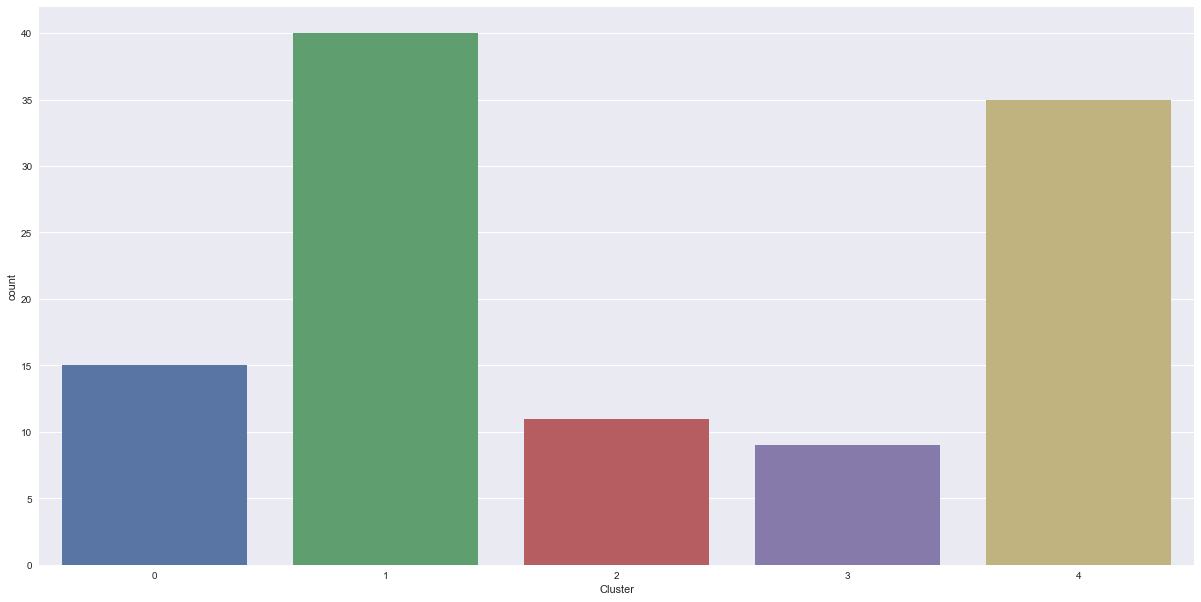

In [7]:
test_frame = pd.DataFrame()
test_frame['Death rate'] = dataframe["Death rate(deaths/1000 population)"]
test_frame['Unemployment rate'] = dataframe["Unemployment rate(%)"]
test_frame['Exports'] = dataframe["Exports"]
test_frame['Debt external'] = dataframe["Debt - external"]
test_frame['GDP - per capita'] = dataframe["GDP - per capita"]
test_frame['Population'] = dataframe["Population"]
test_frame['Area'] = dataframe["Area(sq km)"]
test_frame['Life expectancy at birth(years)'] = dataframe['Life expectancy at birth(years)']
test_frame['Country'] = dataframe["Country"]
test_frame.set_index("Country", inplace = True) 

test_frame["Exports"]=(test_frame["Exports"]-test_frame["Exports"].mean())/test_frame["Exports"].std()
test_frame["Population"]=(test_frame["Population"]-test_frame["Population"].mean())/test_frame["Population"].std()
test_frame["Area"]=(test_frame["Area"]-test_frame["Area"].mean())/test_frame["Area"].std()
test_frame["Debt external"]=(test_frame["Debt external"]-test_frame["Debt external"].mean())/test_frame["Debt external"].std()
test_frame["GDP - per capita"]=(test_frame["GDP - per capita"]-test_frame["GDP - per capita"].mean())/test_frame["GDP - per capita"].std()


dataset_array = test_frame.values

km = KMeans(n_clusters=5,n_init=10)
km.fit(dataset_array)

labels = km.labels_

results = pd.DataFrame([test_frame.index,labels]).T
results.columns = ['Country', 'Cluster']


clusters = results.groupby(['Cluster'])
print(clusters.count())
print(clusters.sum())
sns.set(rc={'figure.figsize':(20.7,10.27)})
ax = sns.countplot(x="Cluster",data=results)

         Country
Cluster         
0             37
1              5
2              9
3             13
4              1
5             35
6              3
7              5
8              2
                                                   Country
Cluster                                                   
0        AlbaniaArgentinaBahrainBelgiumBelizeBrazilBulg...
1          BotswanaCameroonMozambiqueSouth AfricaSwaziland
2        AlgeriaArmeniaBangladeshBosnia and Herzegovina...
3        AzerbaijanBelarusBoliviaCambodiaGuatemalaIndia...
4                                                 Zimbabwe
5        AustraliaAustriaCanadaChileCosta RicaCubaCypru...
6                                       KenyaLesothoZambia
7            Cote d'IvoireEquatorial GuineaGabonGhanaSudan
8                                      SenegalTurkmenistan


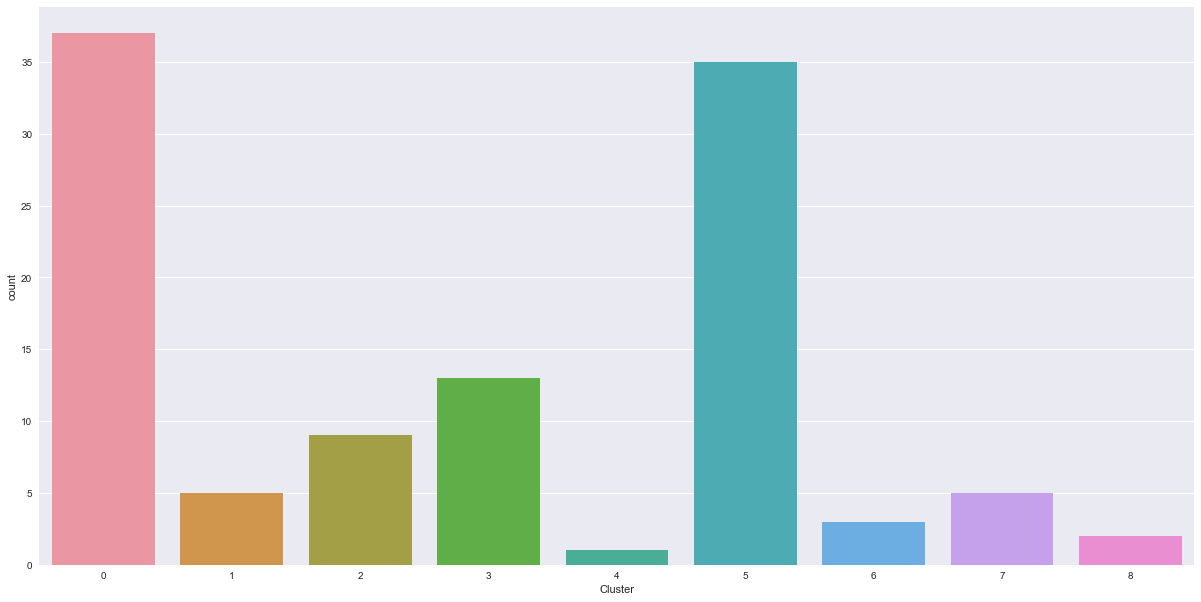

In [10]:
km = KMeans(n_clusters=9,n_init=10)
km.fit(dataset_array)

labels = km.labels_

results = pd.DataFrame([test_frame.index,labels]).T
results.columns = ['Country', 'Cluster']


clusters = results.groupby(['Cluster'])
print(clusters.count())
print(clusters.sum())
sns.set(rc={'figure.figsize':(20.7,10.27)})
ax = sns.countplot(x="Cluster",data=results)